In [171]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import re
import imageio

import matplotlib.cm as cm
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cm.Dark2.colors)

In [172]:
# Function to load CSV and add columns from filename
def load_and_add_columns(file_path):
    print (file_path)
    # Load the CSV file

    
    if mode == "simplereco":
        df = pd.read_csv(file_path) # simple reco
    else:
        df = pd.read_csv(file_path, names=["event_id", "T1_gen", "costheta_gen", "T1_reco", "costheta_reco", "node_dist"])
    
    # Extract <Model>, <NME>, <Pressure>, and <binsize> from the filename
    match = re.match(pattern, file_path)
    
    if match:
        model, nme, pressure, binsize = match.groups()
        print(model,nme,pressure, binsize)
        df['Model'] = model
        df['nme'] = nme
        df['Pressure'] = pressure
        df['binsize'] = binsize
    else:
        print(f"Filename does not match the expected pattern: {file_path}")

    # df["event_id"] =  df['event_id'].astype(int)
    # df = df.sort_values(by='event_id')
    
    return df

In [173]:
mode = "simplereco"


if mode == "simplereco":
    files =  sorted(glob.glob("../files/simplereco/*.txt"))
else:
    files =  sorted(glob.glob("../files/trackingreco/*.txt"))


dfs = []

print(files)


if mode == "simplereco":
    pattern = r'.*/([a-zA-Z0-9]+)_([a-zA-Z0-9]+)_([0-9]+bar)_([0-9]+mm)\.txt' # simple reco
else:
    pattern = r'.*/([a-zA-Z0-9]+)_([a-zA-Z0-9]+)_([0-9]+bar)_([0-9]+mm)_smear_reco_merged\.txt'

for f in files:
    df = load_and_add_columns(f)
    dfs.append(df)

dfs = pd.concat(dfs)

display(dfs[   (dfs.Model =="mbb") & (dfs.binsize == "1mm")  & (dfs.Pressure == "5bar")] )

['../files/simplereco/Leptoquark_SM_10bar_10mm.txt', '../files/simplereco/Leptoquark_SM_10bar_1mm.txt', '../files/simplereco/Leptoquark_SM_10bar_2mm.txt', '../files/simplereco/Leptoquark_SM_10bar_4mm.txt', '../files/simplereco/Leptoquark_SM_15bar_10mm.txt', '../files/simplereco/Leptoquark_SM_15bar_1mm.txt', '../files/simplereco/Leptoquark_SM_15bar_2mm.txt', '../files/simplereco/Leptoquark_SM_15bar_4mm.txt', '../files/simplereco/Leptoquark_SM_1bar_10mm.txt', '../files/simplereco/Leptoquark_SM_1bar_1mm.txt', '../files/simplereco/Leptoquark_SM_1bar_2mm.txt', '../files/simplereco/Leptoquark_SM_1bar_4mm.txt', '../files/simplereco/Leptoquark_SM_5bar_10mm.txt', '../files/simplereco/Leptoquark_SM_5bar_1mm.txt', '../files/simplereco/Leptoquark_SM_5bar_2mm.txt', '../files/simplereco/Leptoquark_SM_5bar_4mm.txt', '../files/simplereco/mbb_QRPAB_10bar_10mm.txt', '../files/simplereco/mbb_QRPAB_10bar_1mm.txt', '../files/simplereco/mbb_QRPAB_10bar_2mm.txt', '../files/simplereco/mbb_QRPAB_10bar_4mm.txt'

,event_id,T1_gen,costheta_gen,T1_true,costheta_true,T1_reco,costheta_reco,Model,nme,Pressure,binsize
0,50.0,1.403427,-0.445946,0.0,0.0,1.403175,-0.492285,mbb,QRPAB,5bar,1mm
1,51.0,1.651563,-0.856688,0.0,0.0,1.651475,-0.877677,mbb,QRPAB,5bar,1mm
2,52.0,1.400900,-0.935085,0.0,0.0,1.836650,-0.993567,mbb,QRPAB,5bar,1mm
3,53.0,1.575053,-0.337720,0.0,0.0,1.621937,-0.202836,mbb,QRPAB,5bar,1mm
4,54.0,1.392648,-0.872729,0.0,0.0,1.392575,-0.916792,mbb,QRPAB,5bar,1mm
...,...,...,...,...,...,...,...,...,...,...,...
7823,445.0,1.932049,-0.088771,0.0,0.0,1.932237,-0.231799,mbb,SM,5bar,1mm
7824,446.0,1.980974,-0.390579,0.0,0.0,2.169687,-0.480041,mbb,SM,5bar,1mm
7825,447.0,2.168257,0.080290,0.0,0.0,2.168600,0.522525,mbb,SM,5bar,1mm
7826,448.0,1.395024,-0.448820,0.0,0.0,1.397475,-0.524716,mbb,SM,5bar,1mm


In [174]:
def PlotHist(dfs, varname, model, nme, binsize, pressure, ax, norm, useLog, bins_, xlabel, ylabel, labelling):

    if (labelling == "binsize"):
        label = f"{model} {nme} {binsize}"
        title = pressure
    else:
        label = f"{model} {nme} {pressure}"
        title = binsize

    query = dfs[ (dfs.Model == model) & (dfs.nme == nme) & (dfs.Pressure == pressure) & (dfs.binsize == binsize) ]
    ax.hist(query[varname], bins = bins_, density=norm, log=useLog, histtype="step", label = label, linewidth=2);
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.legend()
    ax.set_title(title)
    ax.set_ylim(0, 1.4)

def PlotHistGen(dfs, varname, model, nme, binsize, pressure, ax, norm, useLog, bins_, xlabel, ylabel):
    query = dfs[ (dfs.Model == model) & (dfs.nme == nme) & (dfs.Pressure == pressure) & (dfs.binsize == binsize) ]
    ax.hist(query[varname], bins = bins_, density=norm, log=useLog, histtype="step", label = f"Gen", linewidth=2, color = "k");
    ax.legend()

def PlotHistDiff(dfs, varname,genvarname, model, nme, binsize, pressure, ax, norm, useLog, bins_, xlabel, ylabel, labelling):

    if (labelling == "binsize"):
        label = f"{model} {nme} {binsize}"
        title = pressure
    else:
        label = f"{model} {nme} {pressure}"
        title = binsize

    query = dfs[ (dfs.Model == model) & (dfs.nme == nme) & (dfs.Pressure == pressure) & (dfs.binsize == binsize) ]
    ax.hist(query[varname] - query[genvarname] , bins = bins_, density=norm, log=useLog, histtype="step", label = label, linewidth=2);
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.legend()
    ax.set_title(title)
    # ax.set_ylim(0,4)
    

/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10

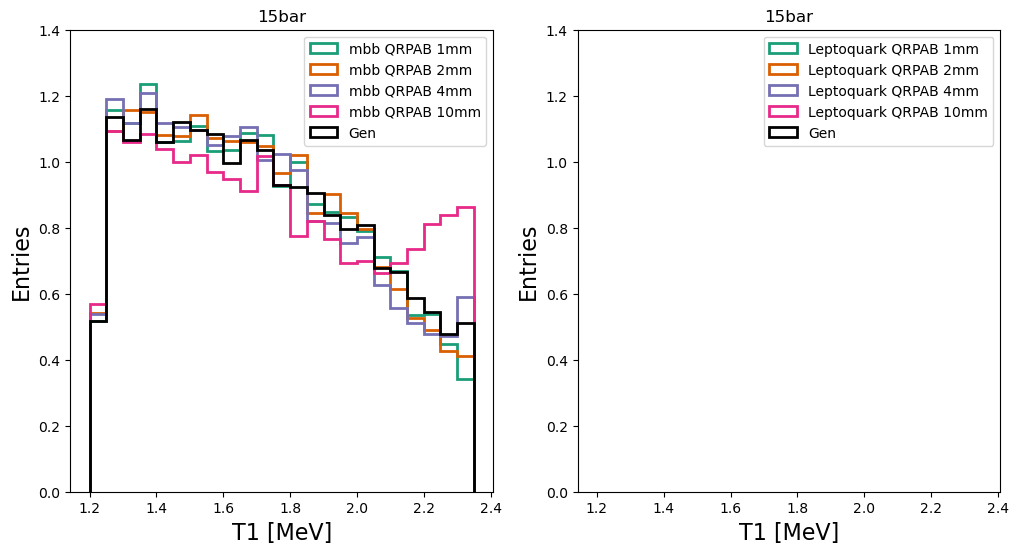

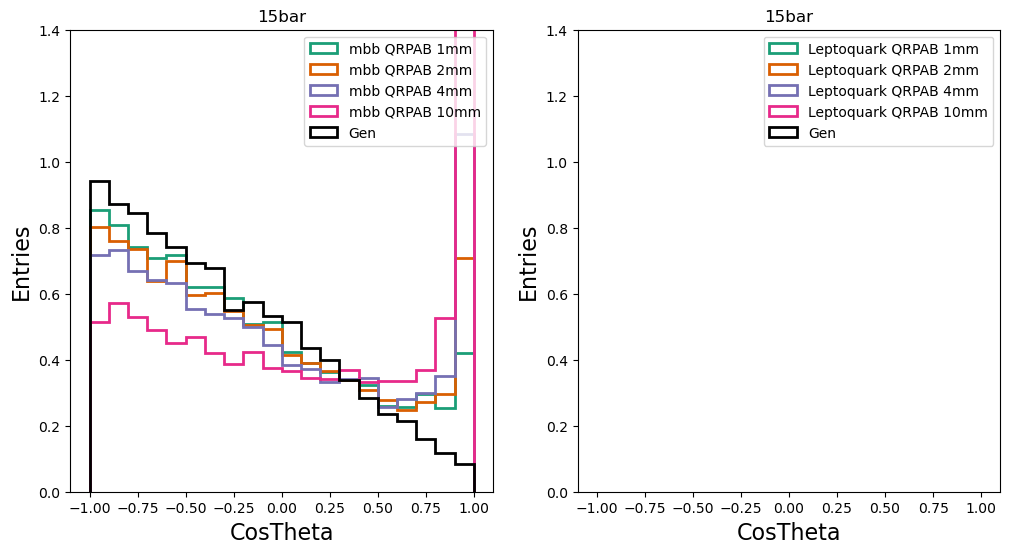

In [175]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
useLog=False
norm=True

pressure = "15bar"
nme="QRPAB"

for bs in ["1mm", "2mm", "4mm", "10mm"]:
    PlotHist(dfs,    "T1_reco", "mbb", nme, bs,pressure, ax1, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries", "binsize")
    PlotHist(dfs,    "T1_reco", "Leptoquark", nme, bs,pressure, ax2, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries", "binsize")

PlotHistGen(dfs, "T1_gen",  "mbb", nme, "1mm",pressure, ax1, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries")
PlotHistGen(dfs, "T1_gen",  "Leptoquark", nme, "1mm",pressure, ax2, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries")

plt.savefig(f"../files/plots/{mode}/{nme}/T1_{nme}_{pressure}.png", dpi=200)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
for bs in ["1mm", "2mm", "4mm", "10mm"]:
    PlotHist(dfs,    "costheta_reco", "mbb", nme, bs,pressure, ax1, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries", "binsize")
    PlotHist(dfs,    "costheta_reco", "Leptoquark", nme, bs,pressure, ax2, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries", "binsize")

PlotHistGen(dfs, "costheta_gen", "mbb", nme,  "1mm",pressure, ax1, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries")
PlotHistGen(dfs, "costheta_gen",  "Leptoquark", nme, "1mm",pressure, ax2, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries")

plt.savefig(f"../files/plots/{mode}/{nme}/Costheta_{nme}_{pressure}.png", dpi=200)

/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10

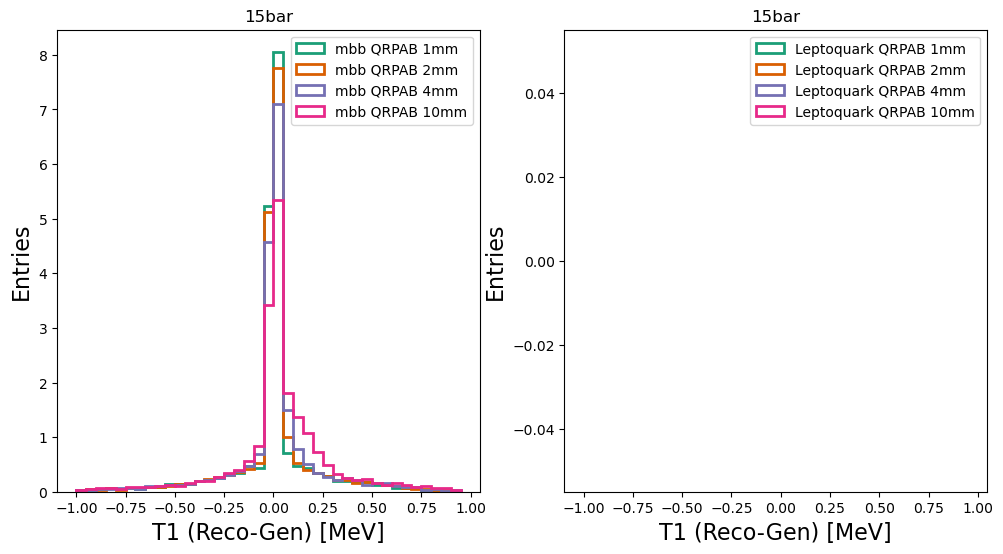

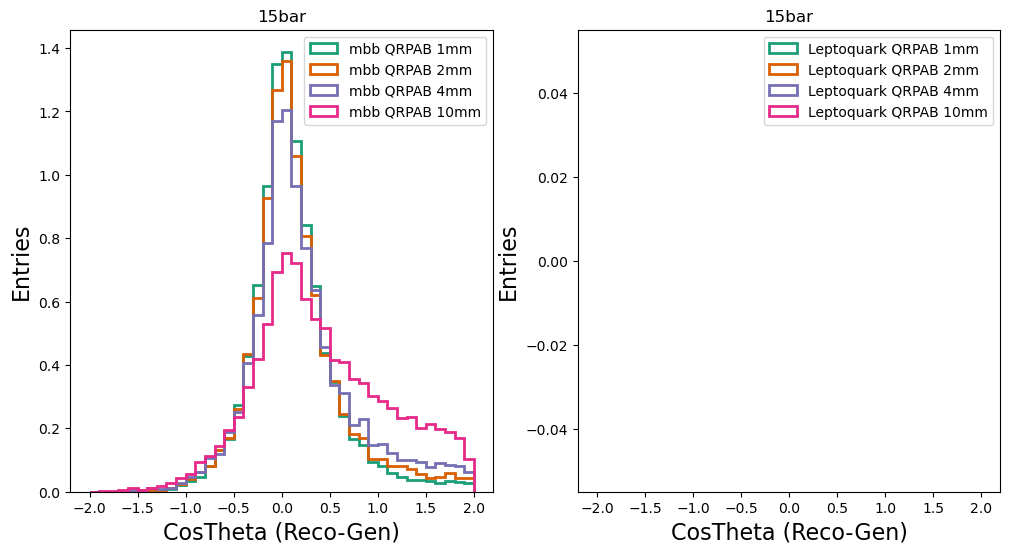

In [176]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
useLog=False
norm=True


for bs in ["1mm", "2mm", "4mm", "10mm"]:
    PlotHistDiff(dfs,    "T1_reco", "T1_gen", "mbb", nme, bs, pressure, ax1, norm, useLog,  np.arange(-1,1,0.05), "T1 (Reco-Gen) [MeV]", "Entries", "binsize")
    PlotHistDiff(dfs,    "T1_reco", "T1_gen", "Leptoquark", nme, bs, pressure, ax2, norm, useLog, np.arange(-1,1,0.05), "T1 (Reco-Gen) [MeV]", "Entries", "binsize")

plt.savefig(f"../files/plots/{mode}/{nme}/T1_diff_{nme}_{pressure}.png", dpi=200)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
for bs in ["1mm", "2mm", "4mm", "10mm"]:
    PlotHistDiff(dfs,    "costheta_reco","costheta_gen", "mbb", nme, bs, pressure, ax1, norm, useLog, np.arange(-2,2.1,0.1), "CosTheta (Reco-Gen)", "Entries", "binsize")
    PlotHistDiff(dfs,    "costheta_reco","costheta_gen", "Leptoquark", nme, bs, pressure, ax2, norm, useLog,  np.arange(-2,2.1,0.1), "CosTheta (Reco-Gen)", "Entries", "binsize")

plt.savefig(f"../files/plots/{mode}/{nme}/Costheta_diff_{nme}_{pressure}.png", dpi=200)

/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10

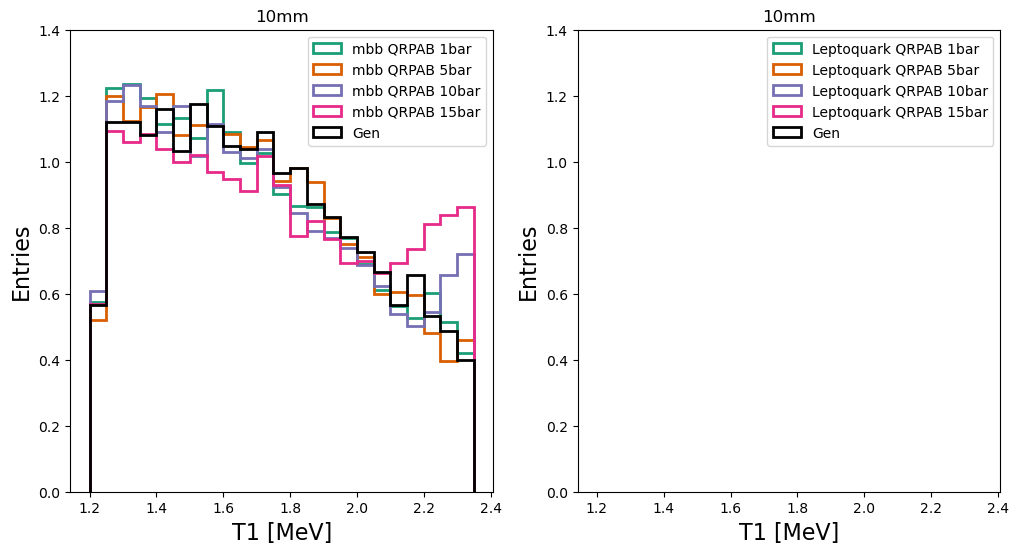

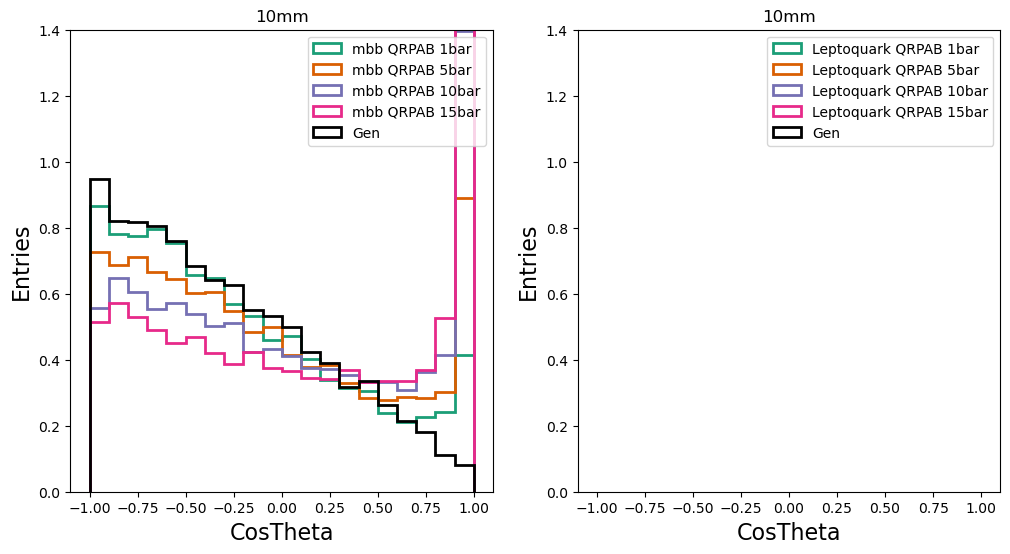

In [177]:
# Compare pressures
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
useLog=False
norm=True

binsize = "10mm"

for p in ["1bar", "5bar", "10bar", "15bar"]:
    PlotHist(dfs,    "T1_reco", "mbb", nme, binsize, p, ax1, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries", "pressure")
    PlotHist(dfs,    "T1_reco", "Leptoquark", nme, binsize, p, ax2, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries", "pressure")


PlotHistGen(dfs, "T1_gen",  "mbb", nme, "1mm", "5bar", ax1, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries")
PlotHistGen(dfs, "T1_gen",  "Leptoquark", nme, "1mm","5bar", ax2, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries")

plt.savefig(f"../files/plots/{mode}/{nme}/T1_{nme}_{binsize}.png", dpi=200)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))

for p in ["1bar", "5bar", "10bar", "15bar"]:
    PlotHist(dfs,    "costheta_reco", "mbb", nme, binsize,p, ax1, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries", "pressure")
    PlotHist(dfs,    "costheta_reco", "Leptoquark", nme, binsize,p, ax2, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries", "pressure")


PlotHistGen(dfs, "costheta_gen", "mbb", nme,  "1mm","5bar", ax1, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries")
PlotHistGen(dfs, "costheta_gen",  "Leptoquark", nme, "1mm","5bar", ax2, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries")

plt.savefig(f"../files/plots/{mode}/{nme}/Costheta_{nme}_{binsize}.png", dpi=200)

/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10

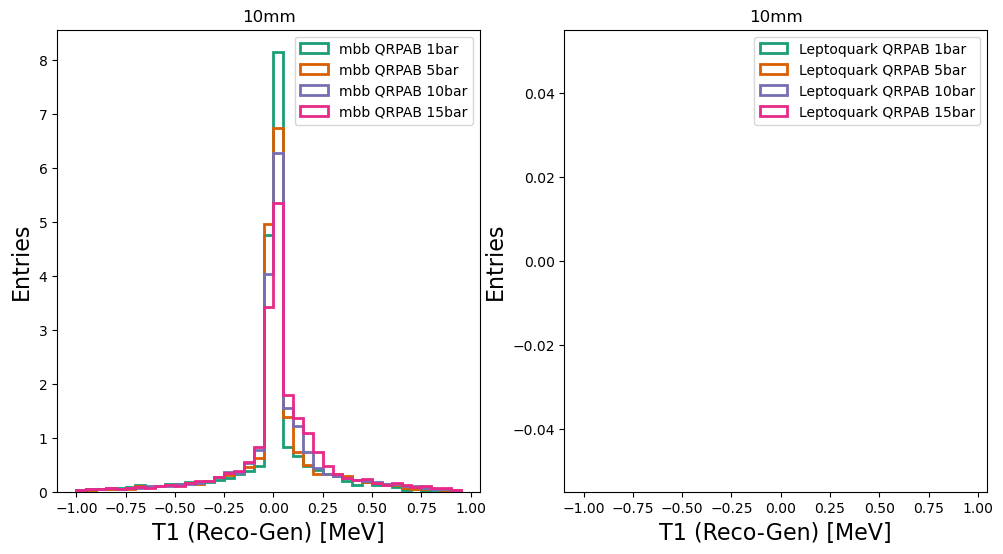

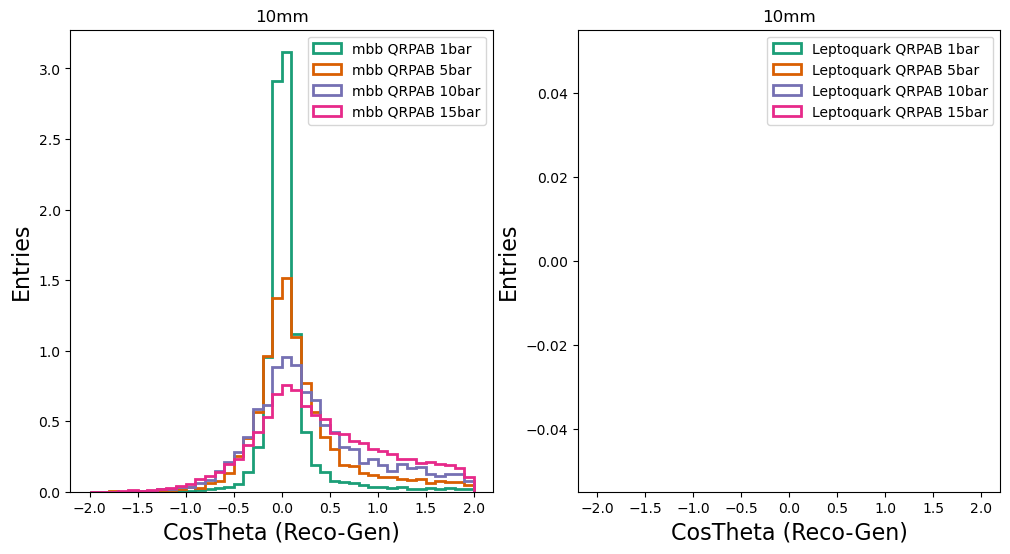

In [178]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
useLog=False
norm=True

for p in ["1bar", "5bar", "10bar", "15bar"]:
    PlotHistDiff(dfs,    "T1_reco", "T1_gen", "mbb", nme, binsize, p, ax1, norm, useLog,  np.arange(-1,1,0.05), "T1 (Reco-Gen) [MeV]", "Entries", "pressure")
    PlotHistDiff(dfs,    "T1_reco", "T1_gen", "Leptoquark", nme, binsize, p, ax2, norm, useLog, np.arange(-1,1,0.05), "T1 (Reco-Gen) [MeV]", "Entries", "pressure")

plt.savefig(f"../files/plots/{mode}/{nme}/T1_diff_{nme}_{binsize}.png", dpi=200)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))

for p in ["1bar", "5bar", "10bar", "15bar"]:
    PlotHistDiff(dfs,    "costheta_reco","costheta_gen", "mbb", nme, binsize, p, ax1, norm, useLog, np.arange(-2,2.1,0.1), "CosTheta (Reco-Gen)", "Entries", "pressure")
    PlotHistDiff(dfs,    "costheta_reco","costheta_gen", "Leptoquark", nme, binsize, p, ax2, norm, useLog,  np.arange(-2,2.1,0.1), "CosTheta (Reco-Gen)", "Entries", "pressure")

plt.savefig(f"../files/plots/{mode}/{nme}/Costheta_diff_{nme}_{binsize}.png", dpi=200)

In [179]:
# t*

In [180]:
# Save the dataframe to a formatted CSV file
df_slim = dfs[["event_id", "T1_gen", "costheta_gen", "T1_reco", "costheta_reco","Model", "nme", "Pressure", "binsize"]]
# display(df_slim)

for model in df_slim.Model.unique():
    for p in df_slim.Pressure.unique():
        for nme in df_slim.nme.unique():
            for bs in df_slim.binsize.unique():
                query = df_slim[ (df_slim.Model == model) & (df_slim.nme == nme) & (df_slim.Pressure == p) & (df_slim.binsize == bs)][0:5999] # only save 6000 events so they are all equal size
                query = query[["event_id", "T1_gen", "costheta_gen", "T1_reco", "costheta_reco"]]
                query.to_csv(f"../files/{mode}/formatted/{nme}/{model}_{nme}_{p}_{bs}.txt", index=False)
                # display(query)

FileNotFoundError: [Errno 2] No such file or directory: '../files/mode/formatted/Leptoquark_SM_10bar_10mm.txt'

In [ ]:
# Make some gifs

vars = ["T1", "Costheta", "T1_diff", "Costheta_diff"]

# Binsizes
for nme in df_slim.nme.unique():
    for var in vars:
            images = glob.glob(f"../files/plots/{var}_{nme}*mm.png")
            
            with imageio.get_writer(f"../files/plots/{mode}/{nme}/{var}_{nme}_binsizes.gif", mode='I', duration=0.5, loop=0) as writer:
                for filename in images:
                    image = imageio.imread(filename)
                    writer.append_data(image)


# Binsizes
for nme in df_slim.nme.unique():
    for var in vars:
            images = glob.glob(f"../files/plots/{mode}/{var}_{nme}*bar.png")
            
            with imageio.get_writer(f"../files/plots/{mode}/{nme}/{var}_{nme}_pressures.gif", mode='I', duration=0.5, loop=0) as writer:
                for filename in images:
                    image = imageio.imread(filename)
                    writer.append_data(image)

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_12025/1068263924.py:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
